In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf

/home/yanndrade/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/yanndrade/.local/lib/python3.10/site-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
acoes = ['ABEV3.SA', 'ODPV3.SA', 'VIVT3.SA', 'PETR4.SA', 'BBAS3.SA', 'BOVA11.SA']
df_stocks = pd.DataFrame()
for acao in acoes:
    df_stocks[acao] = yf.download(acao, start='2015-01-01')["Close"]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2310 entries, 2015-01-02 to 2024-04-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ABEV3.SA   2310 non-null   float64
 1   ODPV3.SA   2310 non-null   float64
 2   VIVT3.SA   2310 non-null   float64
 3   PETR4.SA   2310 non-null   float64
 4   BBAS3.SA   2310 non-null   float64
 5   BOVA11.SA  2283 non-null   float64
dtypes: float64(6)
memory usage: 126.3 KB


In [5]:
df_stocks.dropna(inplace = True)

In [11]:
df_stocks

,ABEV3.SA,ODPV3.SA,VIVT3.SA,PETR4.SA,BBAS3.SA,BOVA11.SA
Date,,,,,,
2015-01-02,16.020000,8.518181,37.820000,9.360000,11.325000,47.259998
2015-01-05,15.730000,8.745454,37.070000,8.560000,11.090000,46.320000
2015-01-06,16.330000,8.681818,36.150002,8.280000,11.245000,46.580002
2015-01-07,16.559999,8.809090,37.389999,8.670000,11.740000,48.150002
2015-01-08,16.540001,8.781818,38.910000,9.230000,11.780000,48.509998
...,...,...,...,...,...,...
2024-04-11,12.200000,11.540000,49.380001,39.299999,28.870001,123.720001
2024-04-12,12.120000,11.670000,49.070000,38.939999,28.495001,122.120003
2024-04-15,12.070000,10.770000,48.810001,39.310001,28.230000,121.550003


In [7]:
df_stocks.to_csv("acoes_ex.csv")

In [8]:
df_stocks.describe()

,ABEV3.SA,ODPV3.SA,VIVT3.SA,PETR4.SA,BBAS3.SA,BOVA11.SA
count,2283.000000,2283.000000,2283.000000,2283.000000,2283.000000,2283.000000
mean,16.897854,11.767776,42.363513,21.999032,17.338169,86.341419
std,2.629330,1.892138,5.483134,8.668678,5.331521,25.167342
min,11.030000,8.130000,28.980000,4.200000,6.350000,36.450001
25%,14.710000,10.318181,38.220001,14.510000,14.142500,62.545000
50%,17.200001,11.672727,42.090000,23.400000,16.650000,92.879997
75%,18.860001,13.000000,45.705000,28.389999,21.365001,107.820000
max,24.270000,16.754545,56.740002,42.900002,29.799999,130.389999


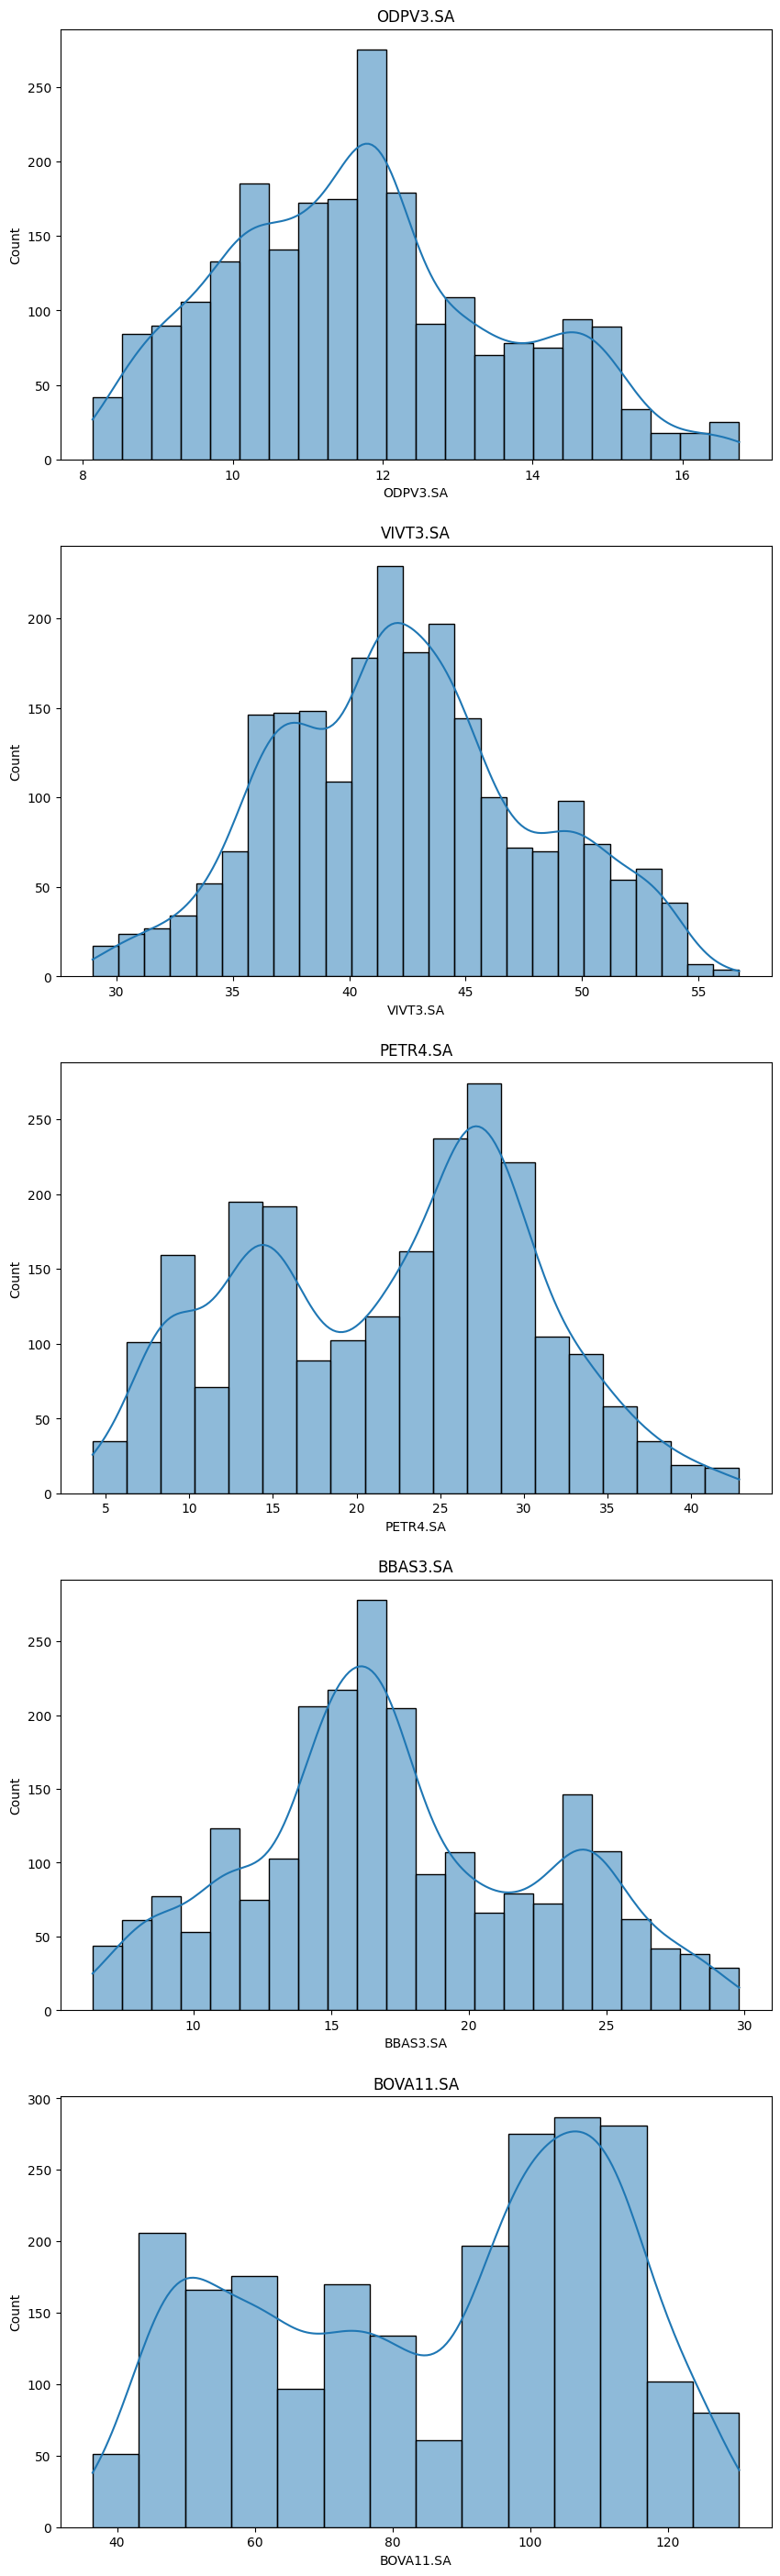

In [9]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(df_stocks.columns)):
    plt.subplot(7, 1, i + 1)
    sns.histplot(df_stocks[df_stocks.columns[i]], kde = True)
    plt.title(df_stocks.columns[i])

In [12]:
figura = px.line(title = 'Histórico do preço das ações')
for i in df_stocks.columns[1:]:
    figura.add_scatter(x = df_stocks['Date'], y = df_stocks[i], name = i)
figura.show()

KeyError: 'Date'

# Profit with stocks

RS = 100*(Pf - Pi)/Pi

Com dividendos => 100*(Pf - Pi)/Pi